# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/Othercomputers/My PC/PGP Course Work/Python/EDA Week 3/foodhub_order.csv')
df=data.copy()

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations:There are 1898 rows and 9 columns in the foodhub_order data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations:

*   There are 5 numerical columns, 4 object type columns in the data
*   We observe that all the columns have same entries which indicates that there is no missing data




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df.isnull().sum() #We can use .isnull().sum() to find any missing calues in the columns

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


Observations:

*   We can see that for all the columns the result is 0.This indicates that the data is clean and complete.No handling of missing values or dropping is needed







### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
data.drop(columns=['order_id','customer_id']).describe()
#.describe().T transposes the summary table for better readability, we can drop columns like order_id and customer_id as they are used as identifiers

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


Observations:
*   **cost_of_the_order** : On an average the order cost lies around 16 dollars  and 75% of the orders are around 22 dollars and the maximum order is around 35 dollars.
*   **food_preparation_time** : The minimum time to prepare the food order is 20 mins where as the average is 27 minutes and maximum is 35 minutes
*   **delivery_time** : Most of the orders where delivered with in 20-25 minutes and minimum time for delivery is 15 minutes and maximum is 33 minutes






### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
df[df['rating']=='Not given'].value_counts()

,,,,,,,,,count
order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,
1478399,264399,Han Dynasty,Chinese,29.15,Weekday,Not given,20,24,1
1478390,38612,Vanessa's Dumplings,Chinese,12.13,Weekday,Not given,31,33,1
1478389,68775,Sushi of Gari Tribeca,Japanese,12.13,Weekend,Not given,25,30,1
1478381,111909,Ravagh Persian Grill,Middle Eastern,16.06,Weekend,Not given,28,21,1
1478379,142753,Shake Shack,American,8.63,Weekday,Not given,31,32,1
...,...,...,...,...,...,...,...,...,...
1476557,348787,Otto Enoteca Pizzeria,Italian,16.15,Weekend,Not given,35,22,1
1476555,97991,Blue Ribbon Sushi Bar & Grill,Japanese,9.65,Weekend,Not given,25,26,1
1476554,368663,Shake Shack,American,9.12,Weekend,Not given,31,19,1


#### Observations:There are total of **736** orders where the rating for the food is **not given**


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [11]:
df['order_id'].nunique() #To check unique order ids

1898

In [12]:
df['customer_id'].nunique() #To check unique Customer ids

1200

In [13]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

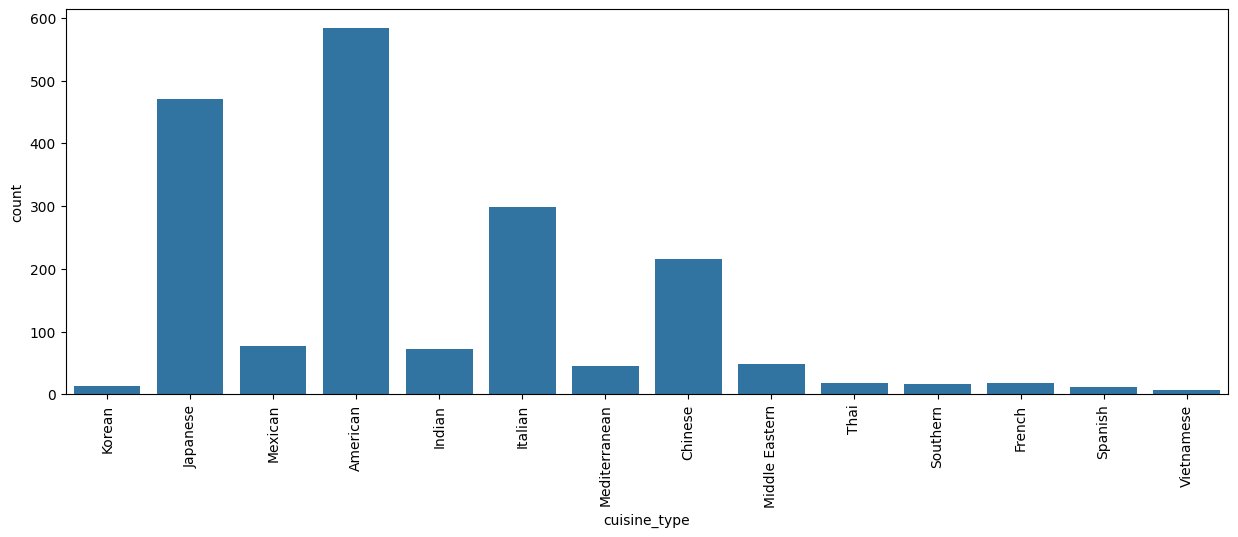

In [14]:
plt.subplots(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation = 90)
plt.show()

Observations:


*   The most ordered cuisine type is American followed by Japanese and Italian.The other cuisines like 'Korean','Vietnamese','Spanish' have much lower orders.




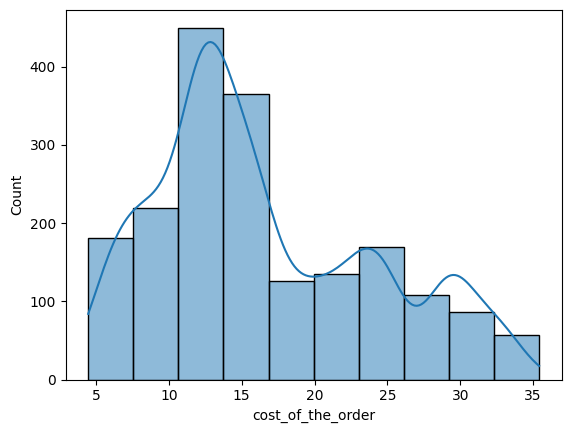

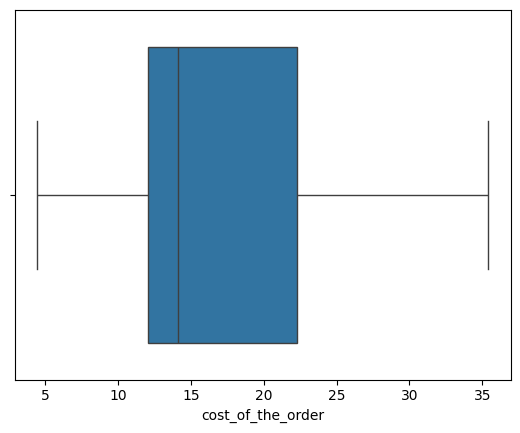

In [15]:
#fig, ax = plt.subplots(figsize=(20,6))
sns.histplot(data=df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

Observations:


* We can see that the order ranges from \$4.5 to \$35, with the average value of \$16.5.

* Also, we can observe that the
distribution is right-skewed which means majority of the orders are on lower end of the cost

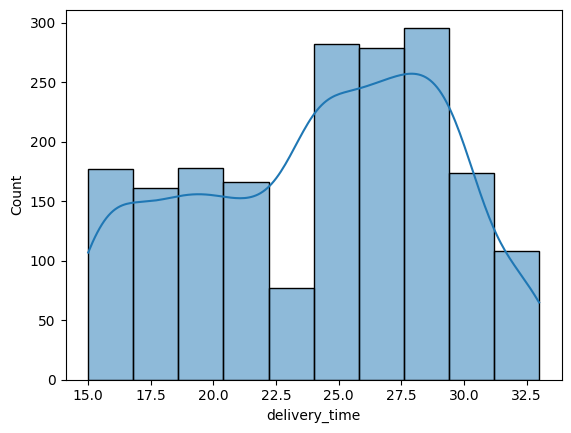

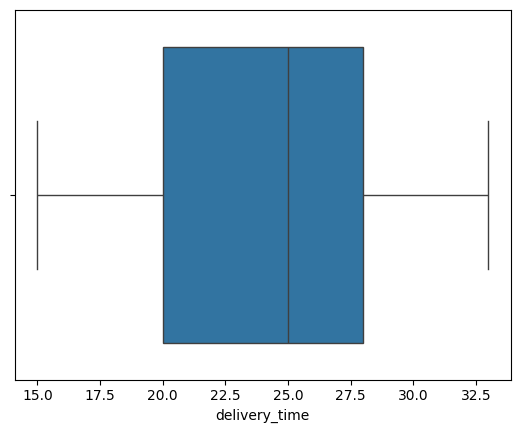

In [16]:
sns.histplot(data=df, x='delivery_time',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

Observations:


*   We can see that the distribution is left-skewed
*   The delivery time ranges from 15 to 33 minutes with and average of 25 minutes and also the distribution seems to be symmetrical near the average means most of the orders take  25-28 minutes

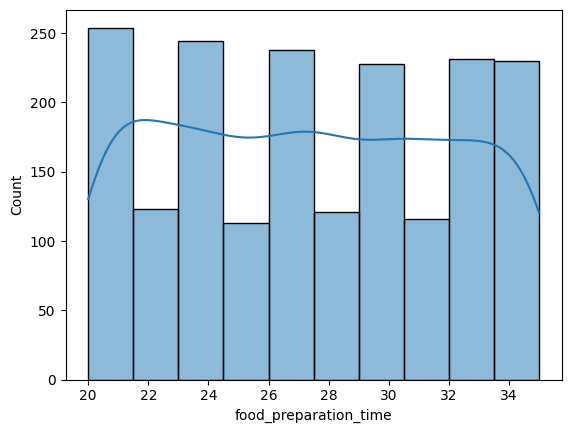

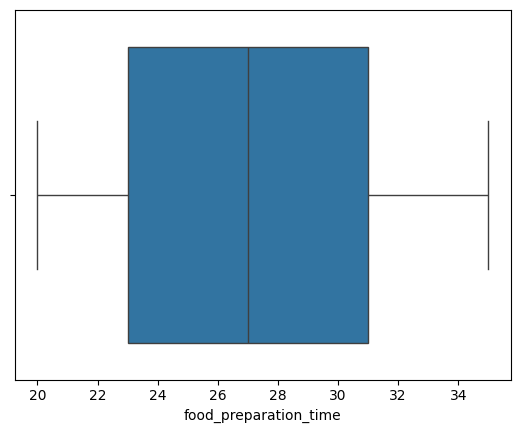

In [17]:
sns.histplot(data=df, x='food_preparation_time',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

Observations:


*   The distribution seems to be fairly symmetrical with preparation time ranging from 20 - 35 minutes ,with an average of 27 minutes

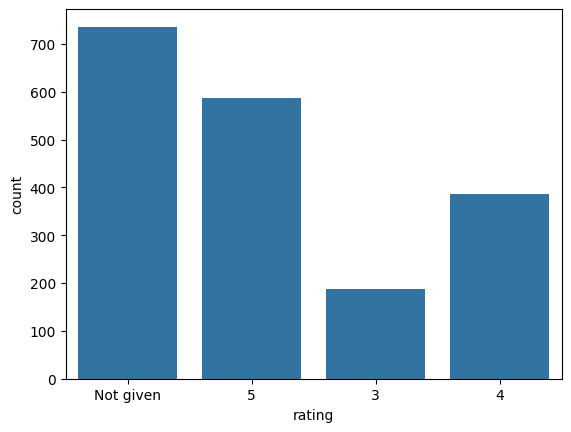

In [18]:
sns.countplot(data=df, x='rating')
plt.show()



Observations:


*   We see that a substanicial portion of orders were not rated .Between the rated orders, 5 is the most common rating given , followed by 4 and then 3

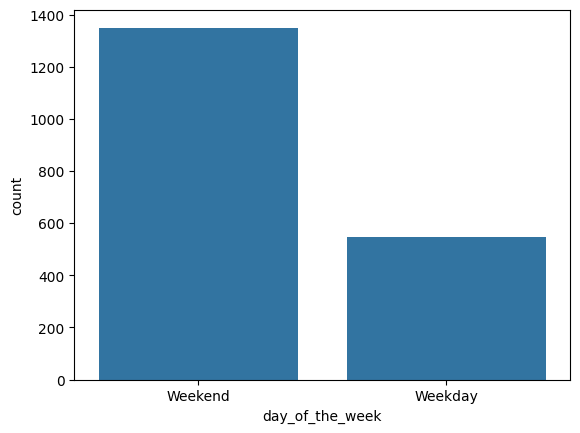

In [19]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()

Observations:


*   Most of the orders are placed during the 'weekend' compared to 'weekday'

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here
df['restaurant_name'].value_counts().head()
#df.groupby('cuisine_type')['restaurant_name'].unique().apply(list)


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


Observations:


*  We can observe that Shake Shack is the top most resturant with highest number of food orders with 219 orders and next is The Meatball Shop with 132 orders and Blue Ribbon sushi with 119 and Blue ribbon Fried Chicken with 96 orders and Parm with 68 orders while the most of the orders are from american restaurants





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here

df_weekends = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine_weekend = df_weekends['cuisine_type'].value_counts().head(1).index[0]
print("The most popular cuisine on weekends is:",most_popular_cuisine_weekend)
#Here value_counts().head(1)return the top frequent value .index[0]gets the first label element from that list

The most popular cuisine on weekends is: American


#### Observations:The most popular cuisine on weekends is American which totally makes sense because it has highest number of orders than any other cuisine


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
df_order_above_twenty=df[df['cost_of_the_order']>20]#filters the orders cost more than $20
df_order_above_twenty.shape[0] #gets the total number of rows in the df
df_percentage_order_above_twenty=df_order_above_twenty.shape[0]/df.shape[0]*100
print("The percentage of the orders cost more than 20 dollars is",round(df_percentage_order_above_twenty,2),"%")

The percentage of the orders cost more than 20 dollars is 29.24 %


#### Observations:We can observe that almost 30% of the orders cost more than 20$ in the dataset


### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here
mean_delivery_time=df['delivery_time'].mean()
print("The mean delivery time for orders is :",round(mean_delivery_time,2))

The mean delivery time for orders is : 24.16


#### Observations : We can observe that average time is 24 minutes which lies exactly between min 15 minutes and max 33 minutes indicating a balanced and symmetric distribution of processing time ,indicating a room for moderate improvement.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Using groupby to find the top 3 most frequent customers
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:The most ordered customer has total orders of 13 and next one is 10 and next is 9.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


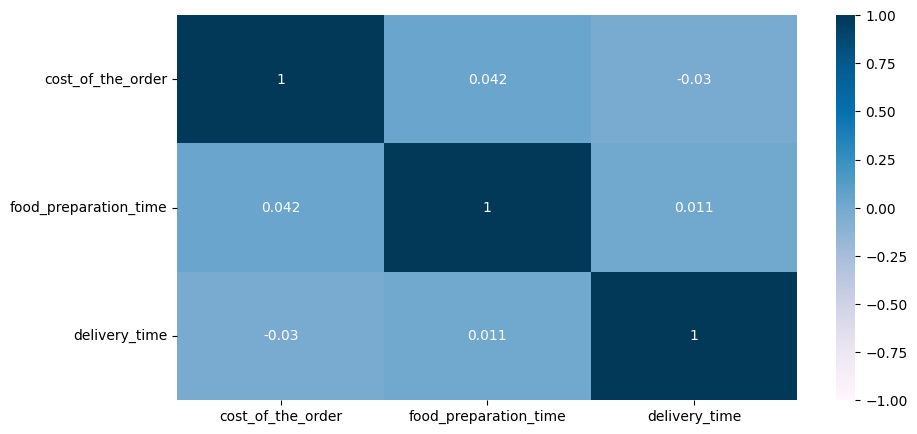

In [25]:
df_new=df[['cost_of_the_order','food_preparation_time','delivery_time']]
plt.figure(figsize=(10,5))
sns.heatmap(df_new.corr(),annot=True,cmap='PuBu',vmin=-1,vmax=1)
plt.show()

Observations:


*   We can see in the heatmap that there is no strong correlation between the variables




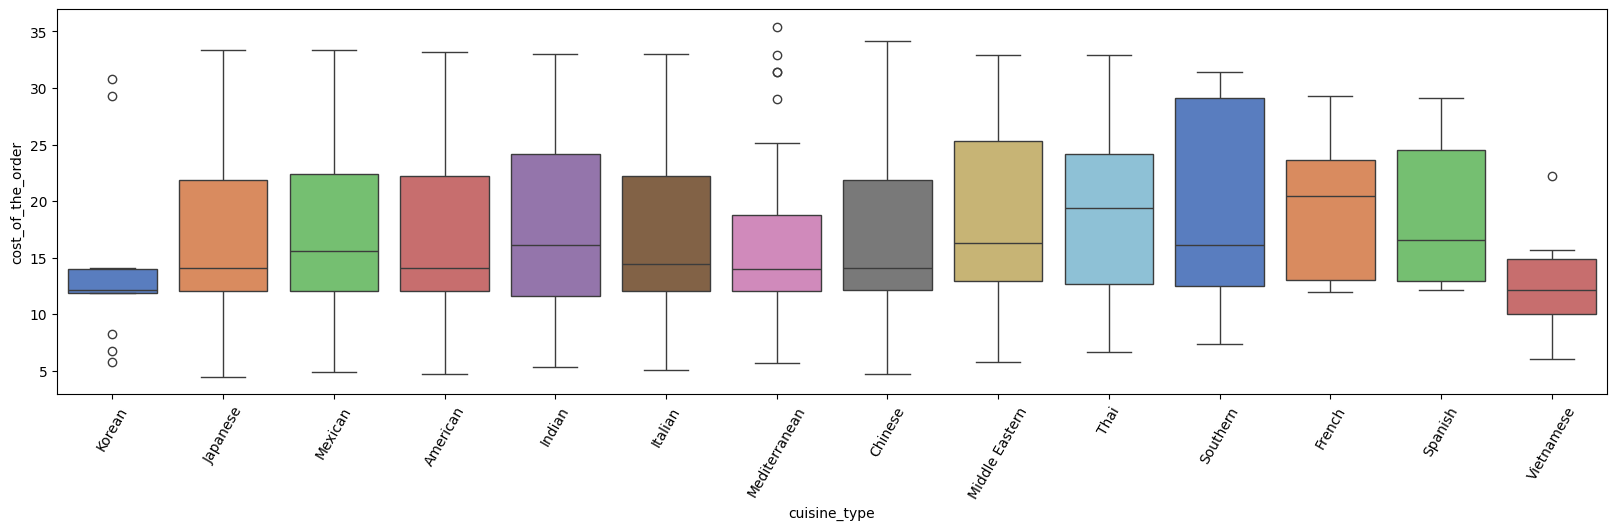

In [26]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order',hue='cuisine_type',palette='muted');
plt.xticks(rotation = 60)
plt.show()

Observatons:


*   We can see that cost of the order can vary a lot depending on the
cuisine,but Korean,Mediterranean and Vietnamese have few outlier means to be on the higher cost price.




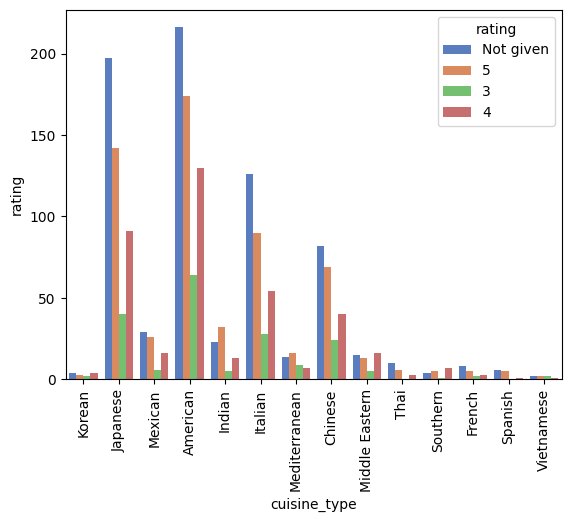

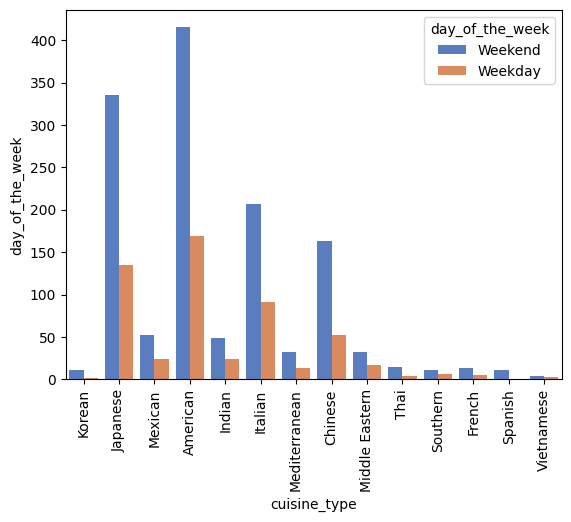

In [27]:
sns.countplot(data=df, x='cuisine_type', hue='rating', palette='muted');
plt.xticks(rotation = 90)
plt.ylabel('rating')
plt.show()
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', palette='muted')
plt.xticks(rotation = 90)
plt.ylabel('day_of_the_week')
plt.show()

Observations:


Cuisine type and Rating

*   We can see that American cuisine takes the top spot for the order rating.Japanese and Italian cuisines follow closely behind,having strong demand and rating,however they also have a large chunk orders which are not rated.Which means that customers are clearly ordering but not sharing their experience.

Cuisine type and Day of the week

*  We can see that the popularity of the cuisine is same irrespective of the day of the week. But comparatively the demand is low during the weekdays.





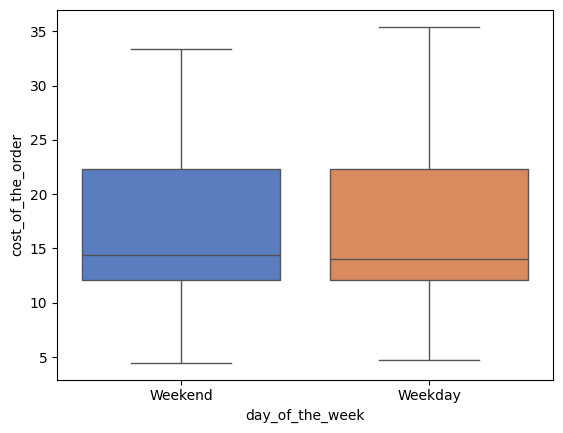

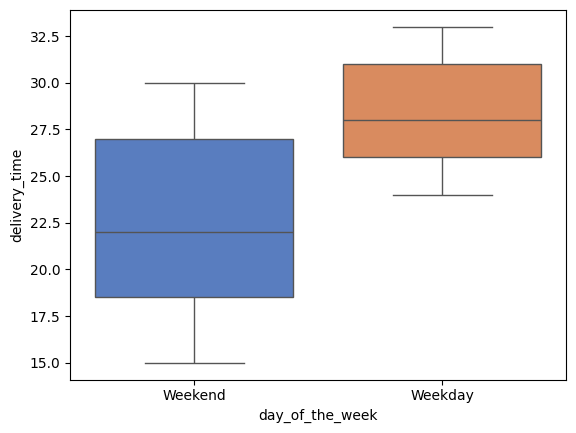

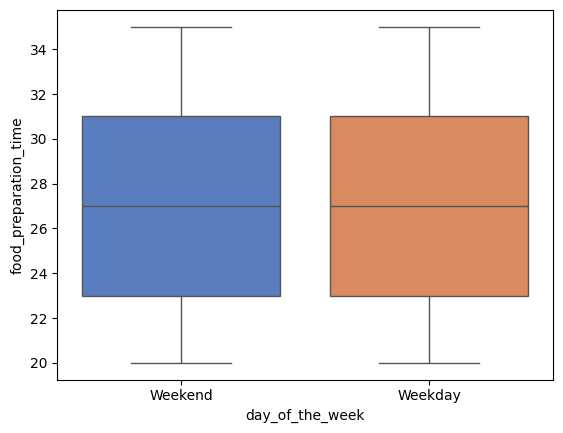

In [28]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order',hue='day_of_the_week',palette='muted');
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time',hue='day_of_the_week',palette='muted');
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time',hue='day_of_the_week',palette='muted');
plt.show()

Observations:


*   We can observe that the distribution is steady irrespective of the day of the week,except the devilery time during the weekdays where the median shows around 28 minutes takes longer than the weekends where the median is around 22.5 minutes.




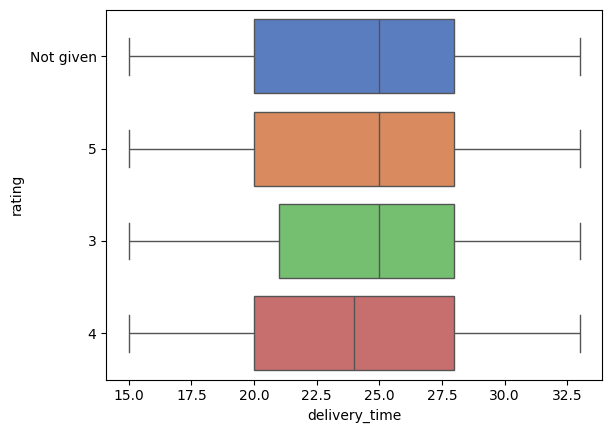

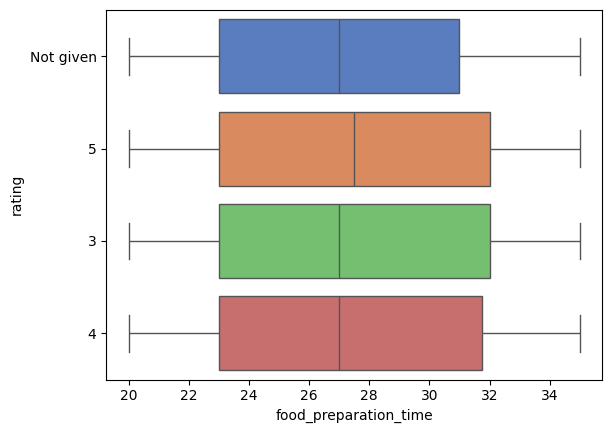

In [29]:
sns.boxplot(y = 'rating', x= 'delivery_time', data = df, hue='rating', palette='muted')
plt.show()
sns.boxplot(y = 'rating', x= 'food_preparation_time', data = df, hue='rating', palette='muted')
plt.show()


Observations:


*   We can see that the Median for delivey time is almost same for all the ratings,meaning that there is no strong relationship between the customer rating and delivery time.
*   Also same for the food preparation time,it seems that the rating is not given based on food preparation time and delivery,it could be based on the factors like quality,price v/s quantity.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [30]:
# Write the code here
df_rating=df[df['rating']!='Not given'].copy()
#Here convert from object to int is needed in order to calculate mean/total count values
df_rating['rating']=df_rating['rating'].astype(int)


df_rating_count=df_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_restaurant_rating_above_50=df_rating_count[df_rating_count['rating']>50]
df_restaurant_rating_above_50

#mean
df_mean = df_rating[df_rating['restaurant_name'].isin(df_restaurant_rating_above_50['restaurant_name'])].copy()
df_rest_mean=df_mean.groupby(['restaurant_name'])['rating'].mean().reset_index()
rest_promo_offer=df_rest_mean[df_rest_mean['rating']>4].sort_values(by='rating',ascending=False).reset_index(drop=True)
rest_promo_offer

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   Four restaurants (The Meatball Shop	,Blue Ribbon Fried Chicken,Shake Shack,Blue Ribbon Sushi) are eligible to get the promotional offer





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [31]:
# Write the code here
def company_charge(cost):
  if cost>20:
    return cost*0.25
  elif cost>5:
    return cost*0.15
df['revenue']=df['cost_of_the_order'].apply(company_charge)
df.head()
total_revenue=df['revenue'].sum()
print("The net revenue generated by the company across all orders is:",round(total_revenue,2))


The net revenue generated by the company across all orders is: 6166.3


#### Observations:


*   The company collected around $6166.3 revenue.




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [32]:
# Write the code here
df['total_delivery_time']=df['food_preparation_time']+df['delivery_time']
delivery_time_more_than_60=df[df['total_delivery_time']>60]
percent_more_than_60=delivery_time_more_than_60.shape[0]/df.shape[0]*100
print("Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is:",round(percent_more_than_60,2))

Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is: 10.54


#### Observations:

*   We can observe that about 10.54% of orders take more than 60 minutes to get delivered once the order is placed.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [33]:
# Write the code here
weekdays_mean=df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
print("The delivery time on weekdays is:",round(weekdays_mean,2),"minuties")
weekends_mean=df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print("The delivery time on weekends is:",round(weekends_mean,2),"minuties")

The delivery time on weekdays is: 28.34 minuties
The delivery time on weekends is: 22.47 minuties


#### Observations:

*   We can see that the mean delivery time on weekends is 22.47 minutes and weekdays is 28.34 minutes, which may imply that there might be higher traffic during weekdays.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  **Cuisine Demand** : American,Japanese ,and Italian cuisines are the most popular choices, with a significantly more orders placed on weekends compared to weekdays.

*   **Customer Rating** : Approximately 38.8% of orders were not rated ,indicating an opportunity in collecting the feedback.Among the rated orders,5-stars are most common,followed by 4 and then 3.Ratings do not appear to vary significantly with delivery or food preparation time,suggesting that other factors may influence customer satisfaction.

*  **Day of the Week** : Order volume is higher on the weekends compared to weekdays, indicating increased customer demand during weekends.


* **Delivery Time** : The average delivery time is  longer on weekdays compared to weekends.Additionally,around 10% of the orders exceeds 60 minutes for total preparation and delivery time.





### Recommendations:

*  **Enhance Customer Feedback** : Since a large portion of orders remain unrated ,introduce offers such as small discounts on next order for submitting ratings to encourage feedback collection.


*   **Resource Planning** : Increase driver allocation during weekdays to improve route efficiency and reduce delivery delays. Additionally,increase restaurant staffing on weekends to handle higher order volume effectively.

*  **Delivery Efficiency** : Identify the root causes for orders that take more than 60 minutes (distance,traffic,kitchen delays).


*  **Promotional Offers** : Introduce weekday promotions to balance demand
during the week.Additionally, provide combo value offers to encourage higher-value offers.
